In [7]:
#pip install imblearn==0.0

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [92]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Prepare Data

## Import

In [51]:
data = pd.read_parquet('model_data.parquet')
df = data.copy()
data.head()

,gender,age,married,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
Customer ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,37.0,Yes,0.0,41,34.827662,-118.999073,2.0,9,None,...,One Year,Yes,Credit Card,65.6,593.30,0.0,0.0,381.51,974.81,Stayed
0003-MKNFE,Male,46.0,No,0.0,70,34.162515,-118.203869,0.0,9,None,...,Month-to-Month,No,Credit Card,NaN,542.40,NaN,10.0,96.21,610.28,Stayed
0004-TLHLJ,Male,50.0,No,0.0,-45,33.645672,-117.922613,0.0,4,Offer E,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.0,0.0,134.60,415.45,Churned
0011-IGKFF,Male,NaN,Yes,0.0,89,38.014457,-122.115432,1.0,13,Offer D,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.0,0.0,361.66,1599.51,Churned
0013-EXCHZ,Female,75.0,Yes,0.0,82,34.227846,-119.079903,3.0,3,None,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.0,0.0,22.14,289.54,Churned


## Explore

In [52]:
df.customer_status.unique()

['Stayed', 'Churned', 'Joined']
Categories (3, object): ['Churned', 'Joined', 'Stayed']

In [53]:
#replace  'churned' as 1 & Joined' and 'Stayed' as 0 for  binary classification
df['customer_status'] = (df['customer_status'] == 'Churned').astype(int)

In [54]:
df.customer_status.unique()

array([0, 1])

In [55]:
df.tail()

,gender,age,married,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
Customer ID,,,,,,,,,,,,,,,,,,,,,
9987-LUTYD,Female,NaN,No,0.0,37,32.759327,-116.997260,0.0,13,Offer D,...,One Year,No,Credit Card,55.15,742.90,0.0,0.0,606.84,1349.74,0
9992-RRAMN,Male,40.0,Yes,0.0,-121,37.734971,-120.954271,1.0,22,Offer D,...,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.0,0.0,356.40,2230.10,1
9992-UJOEL,Male,22.0,No,0.0,-56,39.108252,-123.645121,0.0,2,Offer E,...,Month-to-Month,Yes,Credit Card,50.30,92.75,0.0,0.0,37.24,129.99,0
9993-LHIEB,Male,21.0,Yes,0.0,-85,33.001813,-117.263628,5.0,67,Offer A,...,Two Year,No,Credit Card,67.85,4627.65,0.0,0.0,142.04,4769.69,0
9995-HOTOH,Male,36.0,Yes,0.0,125,39.600599,-120.636358,1.0,63,None,...,Two Year,No,Bank Withdrawal,59.00,3707.60,0.0,0.0,0.00,3707.60,0


In [56]:
corr = df.drop('customer_status', axis = 1).select_dtypes('number').corr()
corr

,age,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
age,1.000000,-0.094950,0.010026,-0.000234,-0.002400,-0.028196,0.008065,-0.018575,-0.431804,0.113643,0.031833,-0.001936,0.035234,-0.008043,0.025948
number_of_dependents,-0.094950,1.000000,0.011538,0.035087,-0.027194,0.282518,0.115897,-0.000641,0.219520,-0.145559,0.005333,0.003307,-0.013349,0.076832,0.030147
zip_code,0.010026,0.011538,1.000000,0.075355,-0.024933,-0.007128,0.018467,0.015505,-0.023067,-0.018341,0.019182,0.007907,-0.015255,0.018363,0.021882
latitude,-0.000234,0.035087,0.075355,1.000000,-0.885979,0.025952,0.011963,0.014184,-0.011920,-0.026722,-0.005172,-0.002619,0.014057,-0.001331,0.002604
longitude,-0.002400,-0.027194,-0.024933,-0.885979,1.000000,-0.019711,-0.009672,-0.011886,0.011131,0.029044,0.013945,-0.010984,-0.017188,0.010260,0.002827
number_of_referrals,-0.028196,0.282518,-0.007128,0.025952,-0.019711,1.000000,0.322623,-0.002881,0.063700,0.002806,0.224286,0.009651,-0.031397,0.201607,0.228834
tenure_in_months,0.008065,0.115897,0.018467,0.011963,-0.009672,0.322623,1.000000,0.003841,0.033618,0.168636,0.796082,0.045117,-0.023157,0.636764,0.835383
avg_monthly_long_distance_charges,-0.018575,-0.000641,0.015505,0.014184,-0.011886,-0.002881,0.003841,1.000000,0.008356,0.004953,0.002095,-0.001892,0.004294,0.397952,0.046976
avg_monthly_gb_download,-0.431804,0.219520,-0.023067,-0.011920,0.011131,0.063700,0.033618,0.008356,1.000000,0.057646,0.050168,-0.000769,0.024485,0.013545,0.044984
monthly_charge,0.113643,-0.145559,-0.018341,-0.026722,0.029044,0.002806,0.168636,0.004953,0.057646,1.000000,0.534130,0.007766,0.061950,0.195832,0.455856


<AxesSubplot:>

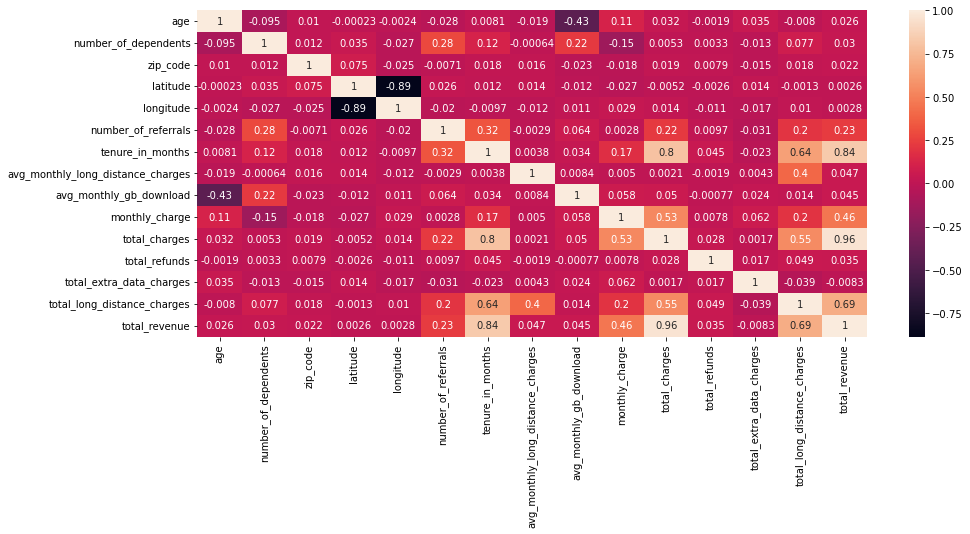

In [57]:
plt.figure(figsize = (15,6))
sns.heatmap(corr, annot = True)

In [119]:
#Drop multicollinearity Cols
df1= df.copy()#df.drop(['total_revenue', 'total_charges', 'total_long_distance_charges'], axis = 1).copy()

In [120]:
corr1 = df1.drop('customer_status', axis = 1).select_dtypes('number').corr()
corr1

,age,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
age,1.000000,-0.094950,0.010026,-0.000234,-0.002400,-0.028196,0.008065,-0.018575,-0.431804,0.113643,0.031833,-0.001936,0.035234,-0.008043,0.025948
number_of_dependents,-0.094950,1.000000,0.011538,0.035087,-0.027194,0.282518,0.115897,-0.000641,0.219520,-0.145559,0.005333,0.003307,-0.013349,0.076832,0.030147
zip_code,0.010026,0.011538,1.000000,0.075355,-0.024933,-0.007128,0.018467,0.015505,-0.023067,-0.018341,0.019182,0.007907,-0.015255,0.018363,0.021882
latitude,-0.000234,0.035087,0.075355,1.000000,-0.885979,0.025952,0.011963,0.014184,-0.011920,-0.026722,-0.005172,-0.002619,0.014057,-0.001331,0.002604
longitude,-0.002400,-0.027194,-0.024933,-0.885979,1.000000,-0.019711,-0.009672,-0.011886,0.011131,0.029044,0.013945,-0.010984,-0.017188,0.010260,0.002827
number_of_referrals,-0.028196,0.282518,-0.007128,0.025952,-0.019711,1.000000,0.322623,-0.002881,0.063700,0.002806,0.224286,0.009651,-0.031397,0.201607,0.228834
tenure_in_months,0.008065,0.115897,0.018467,0.011963,-0.009672,0.322623,1.000000,0.003841,0.033618,0.168636,0.796082,0.045117,-0.023157,0.636764,0.835383
avg_monthly_long_distance_charges,-0.018575,-0.000641,0.015505,0.014184,-0.011886,-0.002881,0.003841,1.000000,0.008356,0.004953,0.002095,-0.001892,0.004294,0.397952,0.046976
avg_monthly_gb_download,-0.431804,0.219520,-0.023067,-0.011920,0.011131,0.063700,0.033618,0.008356,1.000000,0.057646,0.050168,-0.000769,0.024485,0.013545,0.044984
monthly_charge,0.113643,-0.145559,-0.018341,-0.026722,0.029044,0.002806,0.168636,0.004953,0.057646,1.000000,0.534130,0.007766,0.061950,0.195832,0.455856


<AxesSubplot:>

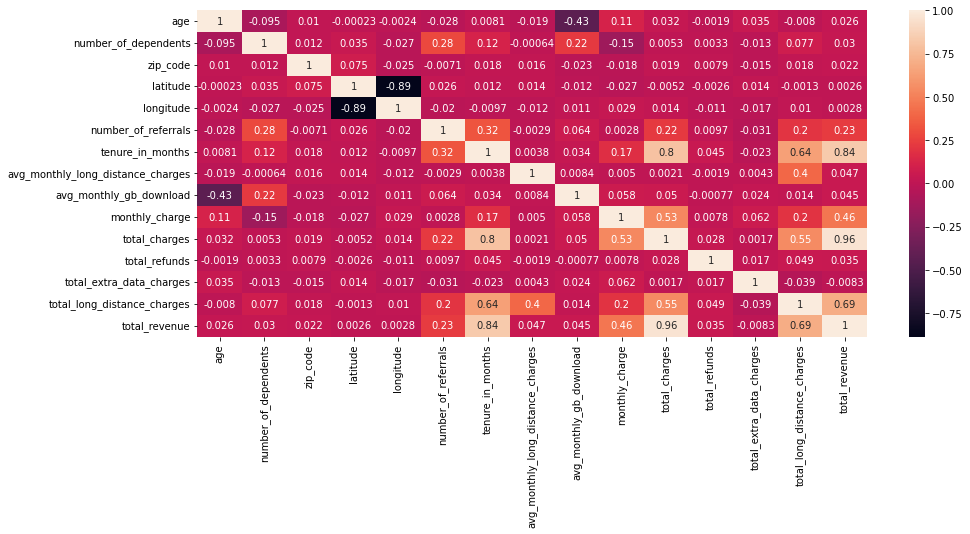

In [121]:
plt.figure(figsize = (15,6))
import seaborn as sns
sns.heatmap(corr1, annot = True)

In [122]:
df1.describe()

,age,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
count,6443.000000,7017.000000,7043.000000,7043.000000,7043.000000,6818.000000,7043.000000,6338.000000,6510.000000,6364.000000,6338.000000,6690.000000,6624.000000,6690.000000,6337.000000,7043.000000
mean,45.883750,0.451190,-2.963084,36.197455,-119.756684,1.685978,32.386767,25.446540,23.637481,63.675990,2108.396362,0.261570,0.999396,632.036000,2824.654881,0.265370
std,14.973058,0.917144,77.959874,2.468929,2.154425,2.662875,24.542061,11.933257,13.777998,28.214801,1949.654766,1.813768,5.198520,690.909804,2452.578827,0.441561
min,21.000000,0.000000,-128.000000,32.555828,-124.301372,0.000000,1.000000,3.610000,4.000000,19.500000,49.650000,0.000000,0.000000,0.000000,78.650000,0.000000
25%,33.000000,0.000000,-72.000000,33.990646,-121.788090,0.000000,9.000000,15.770000,16.000000,39.650000,470.687500,0.000000,0.000000,58.037500,727.260000,0.000000
50%,46.000000,0.000000,-17.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,69.950000,1394.075000,0.000000,0.000000,352.515000,2108.640000,0.000000
75%,58.000000,0.000000,74.000000,38.161321,-117.969795,2.000000,55.000000,35.040000,26.000000,87.250000,3457.787500,0.000000,0.000000,1031.550000,4480.940000,1.000000
max,75.000000,3.000000,127.000000,41.962127,-114.192901,9.000000,72.000000,47.340000,69.000000,107.150000,6914.950000,17.960000,40.000000,2577.490000,8735.350000,1.000000


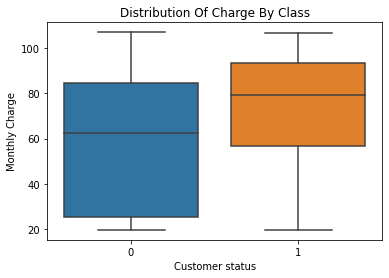

In [123]:
# Create boxplot
sns.boxplot(x = 'customer_status', y = 'monthly_charge', data = df1)
# Label axes
plt.xlabel('Customer status')
plt.ylabel('Monthly Charge')
plt.title('Distribution Of Charge By Class');

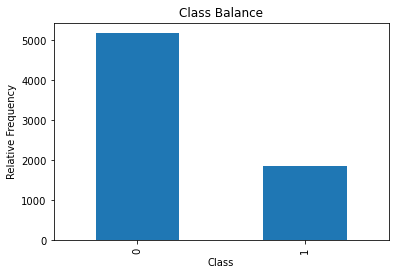

In [124]:
#class balance
df.customer_status.value_counts().plot(kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Relative Frequency')
plt.title('Class Balance');

In [125]:
majority_class_customer, minority_class_customer = df.customer_status.value_counts(normalize = True)
print(majority_class_customer, minority_class_customer)

0.7346301292063041 0.2653698707936959


In [126]:
# Create pivot table
offer_pivot = pd.pivot_table(df, index = 'offer', 
                                  values = 'customer_status', aggfunc = np.mean
).sort_values(by = 'customer_status')
offer_pivot

,customer_status
offer,
Offer A,0.067308
Offer B,0.122573
Offer C,0.228916
Offer D,0.267442
None,0.271086
Offer E,0.529193


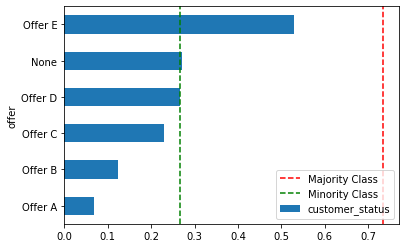

In [127]:
# Plot bar chart of `offer_pivot`
offer_pivot.plot.barh(legend = None)
plt.axvline(
    majority_class_customer, linestyle = '--', color = 'red', label = 'Majority Class'
)
plt.axvline(
    minority_class_customer, linestyle = '--', color = 'green', label = 'Minority Class'
)
plt.legend(loc = 'lower right');

In [128]:
df1.head()

,gender,age,married,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
Customer ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,37.0,Yes,0.0,41,34.827662,-118.999073,2.0,9,None,...,One Year,Yes,Credit Card,65.6,593.30,0.0,0.0,381.51,974.81,0
0003-MKNFE,Male,46.0,No,0.0,70,34.162515,-118.203869,0.0,9,None,...,Month-to-Month,No,Credit Card,NaN,542.40,NaN,10.0,96.21,610.28,0
0004-TLHLJ,Male,50.0,No,0.0,-45,33.645672,-117.922613,0.0,4,Offer E,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.0,0.0,134.60,415.45,1
0011-IGKFF,Male,NaN,Yes,0.0,89,38.014457,-122.115432,1.0,13,Offer D,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.0,0.0,361.66,1599.51,1
0013-EXCHZ,Female,75.0,Yes,0.0,82,34.227846,-119.079903,3.0,3,None,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.0,0.0,22.14,289.54,1


**`Split`**

In [129]:
## target = 'customer_status'
X = df1.drop('customer_status', axis = 1)
y = df1[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (7043, 33)
y shape: (7043,)


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 33)
y_train shape: (5634,)
X_test shape: (1409, 33)
y_test shape: (1409,)


## Resample

In [131]:
under_sampler = RandomUnderSampler(random_state = 42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(2992, 33)


,gender,age,married,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,Male,29.0,Yes,3.0,-125,37.410236,-121.320337,6.0,32,None,...,Yes,One Year,Yes,Bank Withdrawal,NaN,3023.85,0.0,0.0,1172.80,4196.65
1,Female,21.0,Yes,0.0,114,38.990030,-121.114408,0.0,51,Offer B,...,Yes,Month-to-Month,Yes,Bank Withdrawal,49.65,2553.35,0.0,0.0,0.00,2553.35
2,Male,63.0,No,0.0,121,34.196837,-118.142236,0.0,48,None,...,Yes,Two Year,No,Credit Card,19.85,916.00,0.0,0.0,1537.92,2453.92
3,Male,54.0,Yes,2.0,-99,39.195140,-121.503883,1.0,45,None,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.95,4456.65,0.0,0.0,1003.95,5460.60
4,Male,38.0,Yes,3.0,-39,36.819628,-119.440414,1.0,53,None,...,Yes,One Year,No,Credit Card,20.20,1068.15,0.0,0.0,1083.32,2151.47


In [132]:
y_train.value_counts(normalize = True)

0    0.734469
1    0.265531
Name: customer_status, dtype: float64

In [133]:
y_train_under.value_counts(normalize = True)

0    0.5
1    0.5
Name: customer_status, dtype: float64

In [134]:
over_sampler = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(8276, 33)


,gender,age,married,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,Male,38.0,Yes,2.0,-20,33.929704,-118.012080,1.0,3,Offer E,...,Yes,Month-to-Month,No,Bank Withdrawal,89.85,248.40,0.0,0.0,99.90,348.30
1,Male,22.0,No,0.0,-34,32.886925,-117.152162,0.0,36,Offer C,...,Yes,Month-to-Month,Yes,Bank Withdrawal,84.75,3050.15,0.0,0.0,1582.92,4633.07
2,Female,53.0,Yes,0.0,95,37.458090,-122.115398,2.0,49,None,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.60,4783.50,0.0,0.0,2431.87,7215.37
3,Female,54.0,No,0.0,-63,38.801936,-122.938935,0.0,7,None,...,No,Month-to-Month,Yes,Bank Withdrawal,79.30,523.15,0.0,10.0,134.47,667.62
4,Female,38.0,Yes,0.0,-29,36.993666,-119.348267,8.0,2,Offer E,...,Yes,Month-to-Month,Yes,Bank Withdrawal,45.00,89.75,0.0,0.0,31.00,120.75


In [135]:
y_train_over.value_counts(normalize = True)

0    0.5
1    0.5
Name: customer_status, dtype: float64

# Build Model

## Baseline

In [136]:
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.7345


## Iterate

In [137]:
from category_encoders import OneHotEncoder

In [138]:
#fit on 'X_train', 'y_train'
clf_reg = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(strategy='median'),
    StandardScaler(with_mean=True),
    DecisionTreeClassifier(random_state = 42)
)
clf_reg.fit(X_train, y_train)

# #fit on 'X_train_under', 'y_train_under'
clf_under = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(strategy='median'),
    StandardScaler(with_mean=True),
    DecisionTreeClassifier(random_state = 42)
)
clf_under.fit(X_train_under, y_train_under)

#fit on 'X_train_over', 'y_train_over'
clf_over= make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(strategy='median'),
    StandardScaler(with_mean=True),
    DecisionTreeClassifier(random_state = 42)
)
clf_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'married', 'offer',
                                     'phone_service', 'multiple_lines',
                                     'internet_service', 'internet_type',
                                     'online_security', 'online_backup',
                                     'device_protection_plan',
                                     'premium_tech_support', 'streaming_tv',
                                     'streaming_movies', 'streaming_music',
                                     'unlimited_data', 'contract',
                                     'paperless_billing', 'payment_method'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [139]:
for m in [clf_reg, clf_under, clf_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.7722
Training Accuracy: 0.8772
Test Accuracy: 0.7253
Training Accuracy: 1.0
Test Accuracy: 0.7615


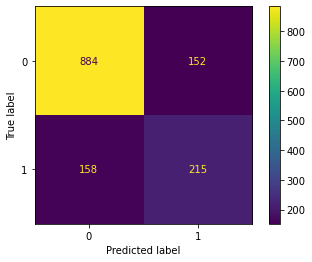

In [118]:
#plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_reg, X_test, y_test)
plt.show()

In [144]:
clf_over.named_steps['decisiontreeclassifier'].get_depth()

32

# Communicate

In [148]:
importances = clf_over.named_steps['decisiontreeclassifier'].feature_importances_
importances

array([3.96546421e-04, 3.58274452e-03, 3.41604898e-02, 1.12275725e-03,
       1.60738843e-04, 2.39237178e-02, 5.07627217e-02, 4.96121447e-02,
       4.14717726e-02, 8.18175666e-02, 3.56169686e-02, 1.04294435e-03,
       1.79945051e-03, 6.04587908e-03, 1.81195958e-03, 6.05399116e-03,
       3.86660222e-04, 6.03343688e-04, 4.83325278e-04, 3.37365486e-02,
       3.03202586e-03, 3.07080488e-03, 0.00000000e+00, 2.76163372e-02,
       0.00000000e+00, 5.73373391e-03, 2.82288273e-03, 3.96842875e-02,
       4.19738709e-03, 4.34429019e-03, 5.60618079e-04, 5.97451123e-04,
       1.60844788e-03, 1.66712312e-03, 4.13891245e-03, 2.35090957e-03,
       1.43530024e-03, 1.22881790e-03, 1.85142320e-03, 1.26470114e-03,
       1.17383869e-03, 3.69833609e-03, 3.18899619e-03, 9.35301872e-04,
       2.95519401e-01, 0.00000000e+00, 1.24650359e-02, 8.05649571e-03,
       1.70355365e-03, 5.24537641e-04, 8.72273982e-03, 2.54394266e-03,
       7.82498535e-02, 2.00847924e-02, 2.75512897e-03, 5.33952025e-03,
      

In [156]:
features = clf_over.named_steps['onehotencoder'].get_feature_names()

In [160]:
feat_imp = pd.Series(importances, index = features).sort_values()
feat_imp.tail(10)

age                            0.034160
tenure_in_months               0.035617
avg_monthly_gb_download        0.039684
total_long_distance_charges    0.041004
longitude                      0.041472
latitude                       0.049612
zip_code                       0.050763
monthly_charge                 0.078250
number_of_referrals            0.081818
contract_Month-to-Month        0.295519
dtype: float64

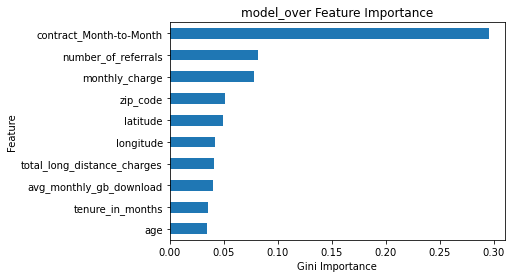

In [166]:
# Plot series
feat_imp.tail(10).plot(kind = 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

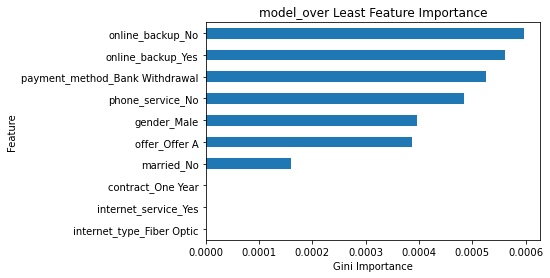

In [165]:
# Plot series
feat_imp.head(10).plot(kind = 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Least Feature Importance");